In [1]:
!pip install apyori
!pip install pandas
!pip install matplotlib
!pip install numpy

In [1]:
from apyori import apriori
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
def market_basket_analysis(transactions, min_support, min_confidence, min_lift):
    """
    Implement Market Basket Analysis using the Apriori algorithm.
    """
    rules = list(apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift))
    
    rules_list = []
    for rule in rules:
        support = rule.support
        for ordered_stat in rule.ordered_statistics:
            confidence = ordered_stat.confidence
            lift = ordered_stat.lift
            rules_list.append([support, confidence, lift])
    
    return pd.DataFrame(rules_list, columns=['Support', 'Confidence', 'Lift']).sort_values('Lift', ascending=False)

In [3]:
def load_groceries_data(file_path):
    """
    Load and preprocess data from a CSV file.
    """
    df = pd.read_csv(file_path)
    return df.groupby('TransactionID')['Item'].apply(list).tolist() if 'TransactionID' in df.columns else df.apply(lambda row: [item for item in row if pd.notna(item) and item != ''], axis=1).tolist()

In [4]:
def plot_frequent_items(transactions, top_n=10):
    """
    Plot the top N most frequent items.
    """
    item_counts = Counter([item for sublist in transactions for item in sublist])
    items, counts = zip(*item_counts.most_common(top_n))
    plt.bar(items, counts, color='skyblue')
    plt.xticks(rotation=45)
    plt.show()

In [5]:
def plot_top_rules_by_lift(rules_df, top_n=5):
    """
    Plot top N rules by Lift.
    """
    top_rules = rules_df.head(top_n)
    plt.bar(range(len(top_rules)), top_rules['Lift'], color='lightgreen')
    plt.xticks(range(len(top_rules)), top_rules.index, rotation=45)
    plt.show()

      Support  Confidence      Lift
92   0.010372    0.359155  3.294710
140  0.010169    0.234192  3.266730
118  0.012304    0.342776  3.144460
1    0.017389    0.331395  3.040058
93   0.010372    0.586207  3.029300
119  0.012304    0.584541  3.020692
122  0.023185    0.309783  2.841793
120  0.023185    0.212687  2.841793
89   0.011491    0.207339  2.770348
99   0.010067    0.385214  2.761075


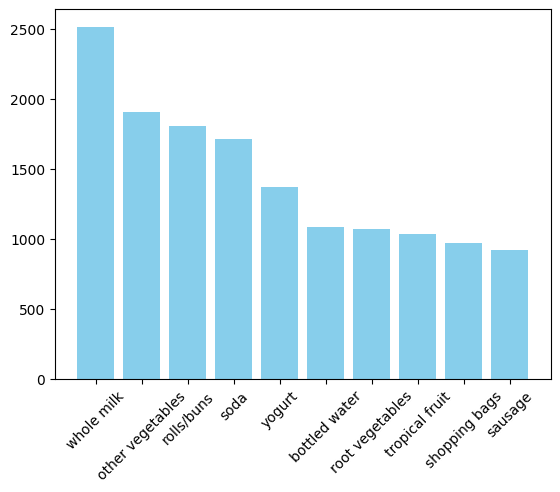

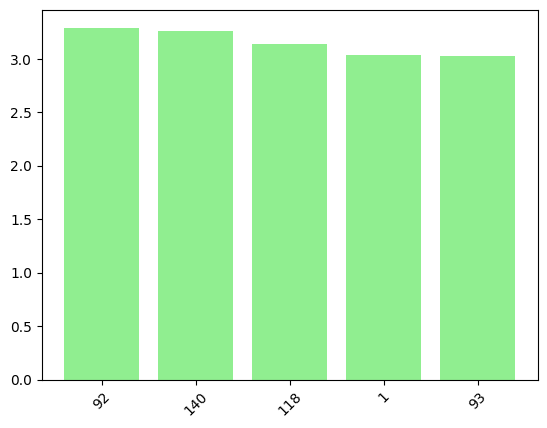

In [6]:
if __name__ == "__main__":
    transactions = load_groceries_data("groceries_final.csv")
    rules_df = market_basket_analysis(transactions, 0.01, 0.2, 1.5)
    print(rules_df.head(10))
    plot_frequent_items(transactions)
    if not rules_df.empty:
        plot_top_rules_by_lift(rules_df)
